In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
import copy



In [3]:
df1=pd.read_excel("forest fire data cleaned.xlsx",sheet_name="Bejaia Region Dataset")
df2=pd.read_excel("forest fire data cleaned.xlsx",sheet_name="Sidi-Bel Abbes Region Dataset")
df1["Region"]=0
df2["Region"]=1


In [4]:
df1.drop(columns="Unnamed: 0",inplace=True)
df2.drop(columns=["Unnamed: 0","index"],inplace=True)


In [5]:
df1.columns=df1.columns.str.strip()
df2.columns=df2.columns.str.strip()


In [6]:
df=pd.concat([df1,df2],axis=0)

In [7]:
df_copy=copy.copy(df)

In [8]:
df.to_csv("final combine forest fire data cleaned.csv")

In [9]:
df["Classes"]=np.where(df["Classes"]=="fire",1,0)

In [10]:
df["Classes"].unique()

array([0, 1])

In [11]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.016461,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.127502,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,0.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 120
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 30.4 KB


### Data is perfectly cleaned now for modle traning

### remove extra featurs

In [13]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
117,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
118,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
119,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [14]:
df.drop(columns=["day","month","year"],inplace=True)

<Axes: >

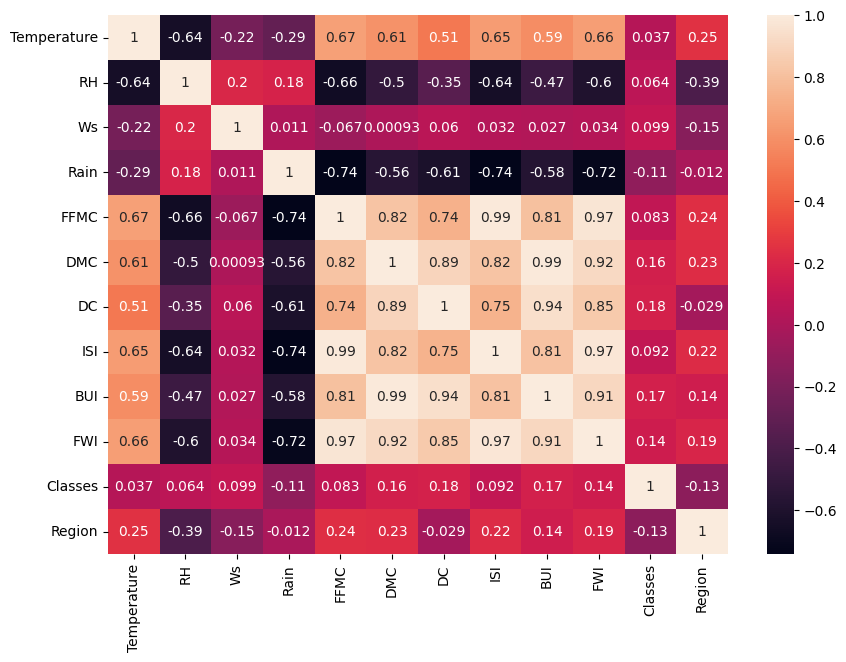

In [15]:
plt.figure(figsize=[10,7])
sbs.heatmap(df.corr("spearman"),annot=True)

In [16]:
x=df.drop(columns="FWI")

In [17]:
y=df["FWI"]

In [18]:
# split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [19]:
## eliminate the multicollinearity

def reduce_multicollinearity(dataframe:pd.DataFrame,reduce_by:float):
    st=set()
    cor=dataframe.corr()
    for i in range(len(cor.columns)): 
        for j in range(i):
                if abs(cor.iloc[i,j])>reduce_by:
                    name=cor.columns[i]
                    st.add(name)
                 
    return st
reduce_multicollinearity(x_train,0.90)

{'BUI'}

In [20]:
#remember the seQuence
x_test.drop(columns=reduce_multicollinearity(x_train,0.90),inplace=True)
x_train.drop(columns=reduce_multicollinearity(x_train,0.90),inplace=True)

In [21]:
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,63.8,5.7,0,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,0,0
30,28,58,18,2.2,63.7,3.2,8.5,1.2,0,1
110,34,58,13,0.2,79.5,18.7,88.0,2.1,0,1
116,30,65,14,0.0,85.4,16.0,44.5,4.5,0,1
...,...,...,...,...,...,...,...,...,...,...
119,24,54,18,0.1,79.7,4.3,15.2,1.7,0,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,0,0
56,36,48,13,0.0,90.3,22.2,108.5,8.7,0,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,0,1


<Axes: >

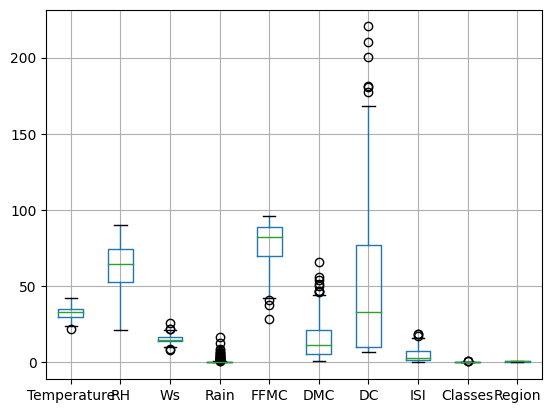

In [22]:
x_train.boxplot()

### standerd scalling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(x_test)

<Axes: >

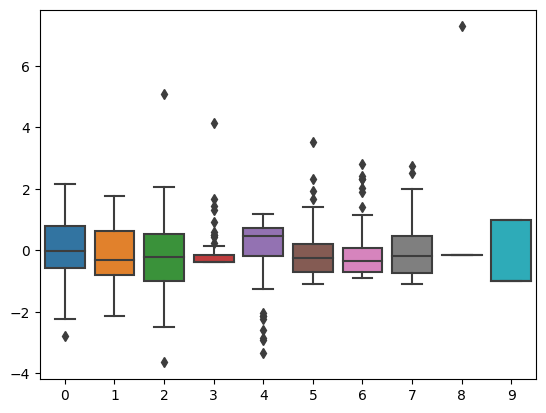

In [24]:
sbs.boxplot(x_test_scaler)

### start the model traing 


#### linear regraction 

In [25]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linear=LinearRegression()
linear.fit(x_train_scaler,y_train)
y_pridic=linear.predict(x_test_scaler)
mar=mean_absolute_error(y_test,y_pridic)
score=r2_score(y_test,y_pridic)
print("error = ",mar,"\nscore = ",score)

error =  0.5637463194742934 
score =  0.9829778944544016


#### Ridge regression

In [26]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge=Ridge()
ridge.fit(x_train_scaler,y_train)
y_pridic=ridge.predict(x_test_scaler)
mar=mean_absolute_error(y_test,y_pridic)
score=r2_score(y_test,y_pridic)
print("error = ",mar,"\nscore = ",score)

error =  0.5798574731333009 
score =  0.9821555552251555


In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
Lassor=Lasso()
Lassor.fit(x_train_scaler,y_train)
y_pridic=Lassor.predict(x_test_scaler)
mar=mean_absolute_error(y_test,y_pridic)
score=r2_score(y_test,y_pridic)
print("error = ",mar,"\nscore = ",score)


error =  1.0982653854252717 
score =  0.9522008632103633


In [28]:
# import pickle as pk
# pk.dump(scaler,open("fire_scaler.plk","wb"))
# pk.dump(linear,open("fire_linear.plk","wb"))


In [31]:
list(scaler.feature_names_in_)
linear.predict

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'Classes',
 'Region']

In [34]:
x_test.iloc[6]

Temperature    28.0
RH             75.0
Ws             16.0
Rain            0.0
FFMC           82.2
DMC             4.4
DC             24.3
ISI             3.3
Classes         0.0
Region          1.0
Name: 93, dtype: float64

In [35]:
y_test.iloc[6]

2.5